In [3]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [4]:
DATA_DIR = './Dataset'
BATCH_SIZE = 50
IMG_SIZE = (224,224)
SEED = 42

In [5]:
training_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="training"
    )

testing_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="validation"
    )


Found 10934 files belonging to 2 classes.
Using 8748 files for training.
Found 10934 files belonging to 2 classes.
Using 2186 files for validation.


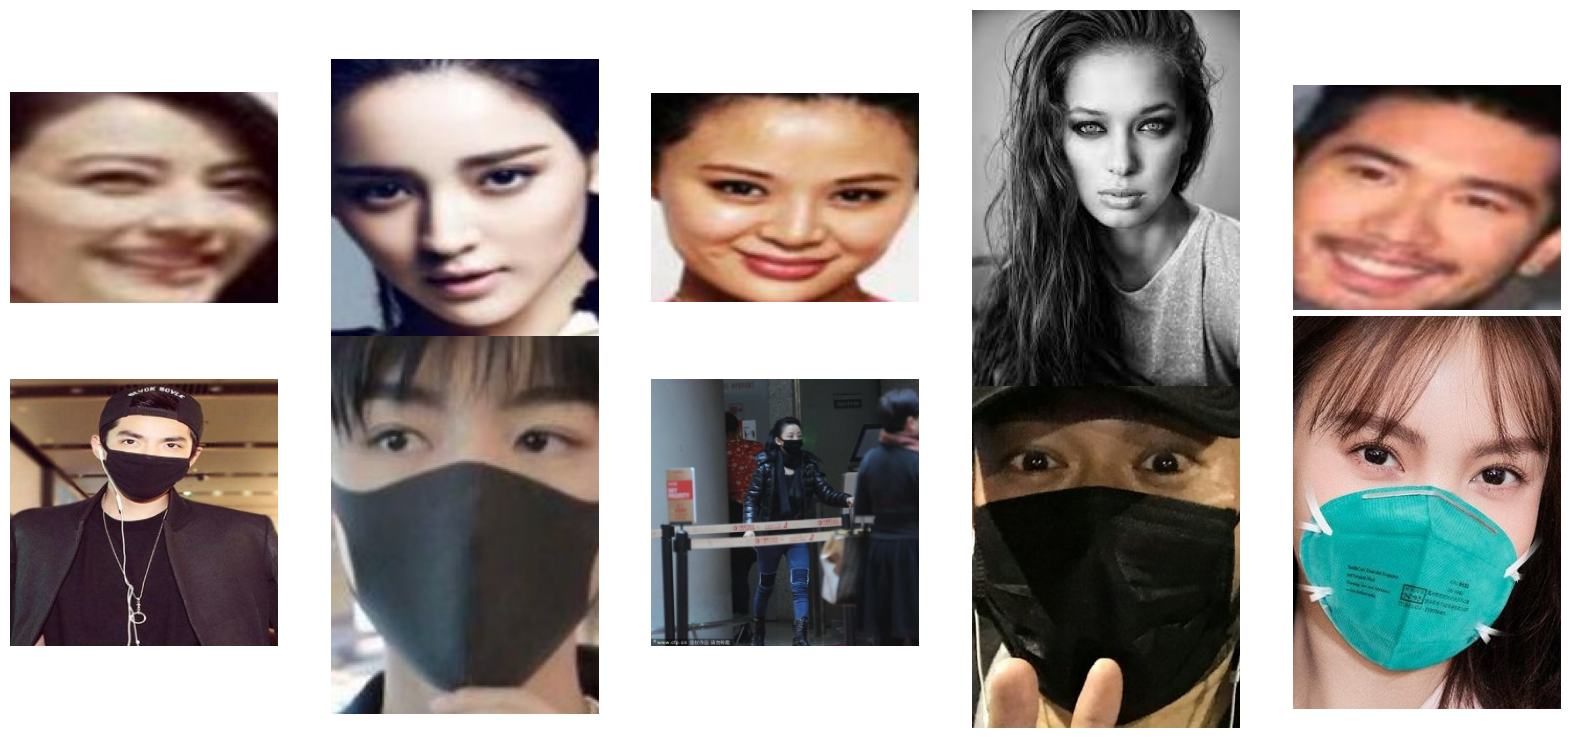

In [6]:
# Here we will display some of the images

sns.set()
sns.set_theme(style="darkgrid")

f = plt.figure(figsize=(20, 15))
without_mask_path = './Dataset/without_mask'
with_mask_path = './Dataset/with_mask'


for i in range(1,6):
    filename = random.choice(os.listdir(with_mask_path))
    image = plt.imread(os.path.join(with_mask_path,filename))
    x = f.add_subplot(1,5,i)
    x.axis(False)
    x.imshow(image)

for i in range(1,6):
    filename = random.choice(os.listdir(without_mask_path))
    image = plt.imread(os.path.join(without_mask_path,filename))
    x = f.add_subplot(2,5,i)
    x.axis(False)
    x.imshow(image)

plt.show()

In [7]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

base_model.trainable = False
    
model = keras.Sequential([
    # Adding the base
    base_model,
    
    # Adding the head
    Flatten(),
    Dense(units=2, activation="sigmoid")
])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       200,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
# Compiling the model with the Adam optimizer and using binary_crossentropy as the loss function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(training_images, epochs=5, steps_per_epoch=20, validation_data=testing_images)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.8545 - loss: 0.9407 - val_accuracy: 0.9899 - val_loss: 0.2032
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.9953 - loss: 0.0582 - val_accuracy: 0.9954 - val_loss: 0.0720
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 164s 8s/step - accuracy: 0.9934 - loss: 0.1341 - val_accuracy: 0.9895 - val_loss: 0.1889
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.9832 - loss: 0.3367 - val_accuracy: 0.9973 - val_loss: 0.0607
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step - accuracy: 0.9939 - loss: 0.1038 - val_accuracy: 0.9899 - val_loss: 0.1509


In [10]:
model.evaluate(testing_images)

44/44 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9834 - loss: 0.2495


[0.15085403621196747, 0.9899359345436096]

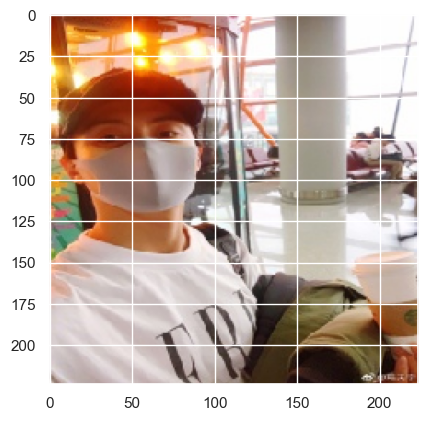

In [13]:
# Loading a random image from the WithMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/with_mask/250.jpg", target_size=([224,224,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [14]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[9.8166692e-01, 4.9275084e-11]], dtype=float32)

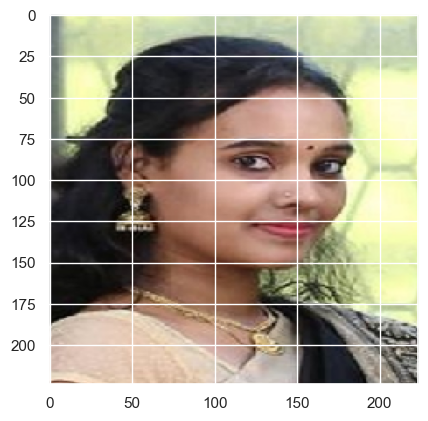

In [15]:
# Loading a random image from the WithoutMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/without_mask/621.jpg", target_size=([224,224,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [16]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[1.7930835e-34, 1.0000000e+00]], dtype=float32)

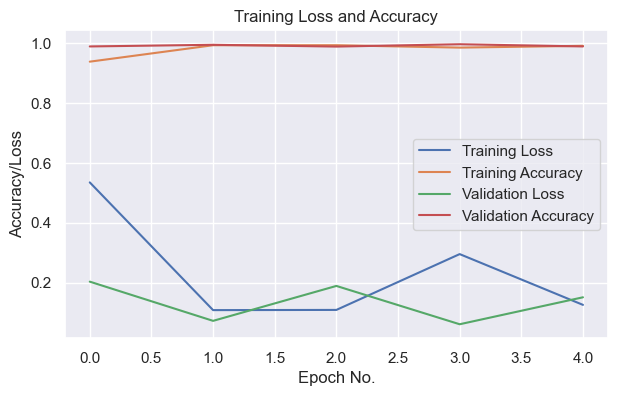

In [17]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_theme(style="darkgrid")

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

no_of_epochs = range(len(training_loss))

sns.lineplot(x = no_of_epochs, y = training_loss, label = "Training Loss")
sns.lineplot(x = no_of_epochs, y = training_accuracy, label = "Training Accuracy")
sns.lineplot(x = no_of_epochs, y = validation_loss, label = "Validation Loss")
sns.lineplot(x = no_of_epochs, y = validation_accuracy, label = "Validation Accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy/Loss")
plt.show()